# Preparation

Pada tahap ini kita perlu mempersiapkan data yang akan dianalisa serta module yang akan dioperasikan

*   Import modul yang dibutuhkan.
*   Upload data (Bisa .xlsx , .csv , .html , dll) yang ingin dianalisa dan jadikan sebuah dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer Churn.csv to Telco Customer Churn.csv


In [4]:
df = pd.read_csv('Telco Customer Churn.csv')

# Data Profiling

Pada tahap Data Profiling, kita akan mencari tahu profil dari data yang akan kita gunakan. Profil tersebut mencakup jumlah kolom, jumlah baris, serta profiling dari masing-masing kolom.

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Untuk mengetahui jumlah kolom dan baris, kita bisa menggunakan '.shape' yang akan mengeluarkan output '(baris (rows), kolom (columns))'
df.shape

(7043, 21)

In [7]:
# Untuk mengetahui kolom apa saja yang ada pada data, gunakan '.columns'
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Untuk mengetahui type data dari masing-masing kolom, gunakan '.dtypes'
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Untuk mengetahui jumlah baris sekaligus nama dari seluruh kolom, kita bisa menggunakan '.axes'
df.axes

[RangeIndex(start=0, stop=7043, step=1),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object')]

In [10]:
# Kita juga bisa mengetahui nilai / fitur unik dari masing-masing kolom menggunakan "namadata['nama kolom'].unique()"

df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# Data Cleansing

Pada tahap ini kita akan melakukan check dan handling terhadap missing value dari data. Metode yang digunakan untuk handling itu sendiri adalah imputation / drop.

In [11]:
# Pada pengecekan pertama kita akan mencari nilai 0 yang terbaca sebagai NA
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

# Variable menunjukkan nama row data yang ter-display
# Missing Values menunjukkan berapa data yang masih terbaca program sebagai 0
# Filling Factor menunjukkan persentasi data yang sudah terisi

,variable,missing values,filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


Kesimpulan dari data tersebut tidak ditemukan missing value yang terbaca sebagai NA oleh program. **Tetapi perlu diperhatikan,** ada jenis missing value yang tidak terbaca NA oleh program namun dapat diketahui dengan pemahaman user seperti contoh " " (spasi).

In [12]:
x = df.sort_values(by=['TotalCharges'])
x.head(15)

# Pada kolom "TotalCharges" terdapat data kosong yang terisi dengan spasi.
# Hal ini dapat diketahui karena hanya beberapa row yang terisi dengan spasi, sementara row lain terisi oleh data numerik

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [13]:
# Karena terdapat missing value pada pengecekan kedua, maka kita perlu melakukan filling terhadap variabel tersebut
# Pada case assignment ini, kita cukup mengisi value tersebut dengan NaN
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:np.NaN if x ==' ' else x)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [14]:
#Pada step ini maka seharusnya data sudah terfilling dengan "NaN"
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# Dan apa bila kita melakukan pengecekan ulang untuk NaN value, filling factor sudah berkurang
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,TotalCharges,11,99.843817
1,customerID,0,100.000000
2,MonthlyCharges,0,100.000000
3,PaymentMethod,0,100.000000
4,PaperlessBilling,0,100.000000
5,Contract,0,100.000000
6,StreamingMovies,0,100.000000
7,StreamingTV,0,100.000000
8,TechSupport,0,100.000000
9,DeviceProtection,0,100.000000


Kemudian sampai pada tahap handling NaN menggunakan drop. Pada penggunaan sehari-hari, drop sangat tidak disarankan. Hal ini dikarenakan sebagai seorang data scientist kita harus sebisa mungkin mempertahankan sample data, sementara drop akan menghilangkan seluruh value data dalam row tersebut.

In [16]:
# Sebelum menggunakan drop, kita bisa terlebih dulu mengecek shape dari data untuk melihat perubahan sebelum dan sesudah proses imputation
df.shape
# Terlihat bahwa data memiliki 7043 rows dan 21 columns

(7043, 21)

In [17]:
# Untuk melakukan drop, kita cukup menggunakan syntax '.dropna()'
df = df.dropna()
df
# Bisa kita lihat pada bagian paling bawah dari output tertulis '7032 rows x 21 column'
# Hal ini menandakan rows dengan value NaN (11 rows) sudah hilang dari dataframe kita.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [18]:
# Dan apa bila kita melakukan pengecekan ulang untuk NaN value, kembali normal
missing_data = df.isnull().sum(axis=0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['filling factor (%)']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


# Categorical Data Encoding

Pada bagian ini kita akan melakukan encoding terhadap beberapa variable dengan fokus terhadap data categorical dan undropped data dari dataframe yang telah di cleansing menggunakan drop. Dimana pada bagian ini kita menggunakan data dummy sebagai pendamping dataframe.

In [21]:
#Pada step ini, perlu dilakukan pengubahan data menjadi object sebelum dilakukan encoding
#Hal ini dikarenakan pada variabel 'SeniorCitizen' harusnya berupa 'Yes' dan 'No'
#Sehingga pada saat encoding, variabel ini akan ter-distinct menjadi 2 column yang berbeda

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:'Yes' if x ==1 else 'No')

In [22]:
#Sebelum membuat data dummy, perlu diperhatikan bahwa pada dataframe awal terdapat variable customer id,
#Dimana pada customer id ini merupakan unique character yang berbeda setiap baris
#Maka dari itu perlu kita lakukan drop sesuai axis. Serta inplace untuk meng-overwrite df

df.drop('customerID', axis=1, inplace=True)

In [23]:
# Untuk variabel Churn memiliki perlakuan khusus karena menjadi target prediksi jika digunakan sebagai model ML
# Sehingga variable Churn harus menjadi 1 kolom ketika Categorical Data Encoding

df['Churn'] = df['Churn'].apply(lambda x:1 if x =='Yes' else 0)

# Pada step ini, variabel Churn berubah menjadi 1 dan 0
# Variabel Churn sendiri merupakan variabel yang menentukan apakah pelanggan tersebut akan kembali berlangganan atau tidak
# Yes == 1 , berarti berhenti berlangganan & No == 0 , berarti lanjut berlangganan

In [24]:
#Setelah itu, barulah kita satukan df yang sudah dibuat dengan data dummy
df_dummy = pd.get_dummies(df)
df_dummy.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,8,99.65,820.50,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,22,89.10,1949.40,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,10,29.75,301.90,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,28,104.80,3046.05,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,62,56.15,3487.95,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


# Handling Outlier and Anomalies

Pada bagian ini, kita akan melakukan outlier dan anomalies handling terhadap dataframe setelah proses imputation / drop. Namun sebelum melakukan outlier handling kita harus mengecek apakah dataframe memiliki outlier atau tidak.

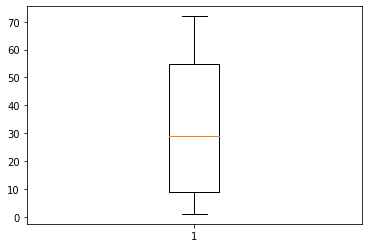

In [25]:
#Berdasarkan dataframe, bagian yang paling mungkin terdapat outlier adalah di bagian tenure, monthly charge, dan total charge
#Hal ini karena selain variabel tersebut, semua merupakan numerical variable
#Pada step ini, saya akan melakukan outlier check menggunakan boxplot

plt.boxplot(df_dummy['tenure'])
plt.show()


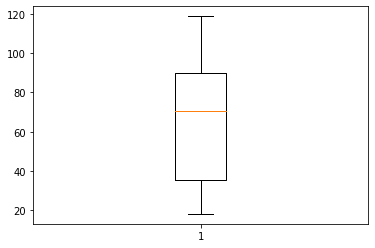

In [26]:
plt.boxplot(df_dummy['MonthlyCharges'])
plt.show()

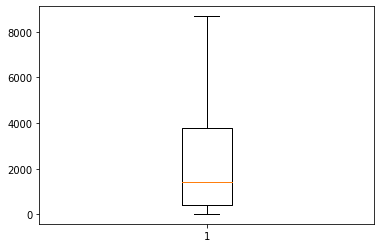

In [27]:
plt.boxplot(df_dummy['TotalCharges'])
plt.show()

Dari ketiga data tersebut, dapat disimpulkan bahwa dataframe tidak memiliki outlier. Tetapi dataframe memiliki data anomalies berupa " " pada bagian "TotalCharges" yang sudah dihandling terlebih dulu pada bagian missing value dengan metode '.dropna()'.

# Data Standardization

Pada bagian ini kita akan melakukan data standardization menggunakan data yang sudah di proses pada bagian sebelumnya yaitu "df_dummy". Data Standardization sendiri bertujuan untuk mengubah mean dari suatu data menjadi 0 dan standar deviasinya menjadi 1. 

In [68]:
# Pertama, kita perlu membuat dataframe dari data yang akan di standarisasi
# Data yang akan di standarisasi adalah 'tenure', 'MonthlyCharges', dan 'TotalCharges' yang berupa numerical
# Kemudian menggunakan 'Churn' sebagai target
X_data = df_dummy[['tenure', 'MonthlyCharges', 'TotalCharges']]
target = df_dummy['Churn']
X_data.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [69]:
# Untuk mengecek summary dari data tersebut bisa menggunakan '.describe()'
X_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [70]:
# Kemudian, kita tinggal melakukan standarisasi dengan syntax 'preprocessing.scale(data yang ingin di standarisasi)'
standard = preprocessing.scale(X_data)
print(standard)

[[-1.28024804 -1.16169394 -0.99419409]
 [ 0.06430269 -0.26087792 -0.17373982]
 [-1.23950408 -0.36392329 -0.95964911]
 ...
 [-0.87280842 -1.17000405 -0.85451414]
 [-1.15801615  0.31916782 -0.87209546]
 [ 1.36810945  1.35793167  2.01234407]]


Namun pada step ini kita mendapat nilai value dari tiga variabel tersebut dalam satu index array. Sehingga step ini bisa dilakukan untuk mengecek hasil standarisasi tapi tidak bisa mengecek describe secara utuh. Untuk mendapat hasil describe standarisasi secara utuh, maka saya pribadi melakukan standarisasi per variabel kemudian hasil standarisasi di tambahkan sebagai kolom baru pada data awal.

In [71]:
# Pertama kita perlu membuat X_data atau data predictor dari masing- masing variabel
X_data1 = df_dummy['tenure']
X_data2 = df_dummy['MonthlyCharges']
X_data3 = df_dummy['TotalCharges']

In [72]:
# Selanjutnya kita lakukan preprocessing terhadap masing-masing predictor
standard1 = preprocessing.scale(X_data1)
standard2 = preprocessing.scale(X_data2)
standard3 = preprocessing.scale(X_data3)

In [ ]:
# Terakhir tambahkan hasil dari standarisasi ke kolom baru di data awal
X_data['tenure_standard'] = standard1
X_data['Monthly_standard'] = standard2
X_data['TotalCharges_standard'] = standard3

In [74]:
# Untuk mengecek apakah kolom sudah ditambahkan serta nilai nya sudah sama dengan standarisasi awal ('standard') gunakan '.head'
X_data.head()

,tenure,MonthlyCharges,TotalCharges,tenure_standard,Monthly_standard,TotalCharges_standard
0,1,29.85,29.85,-1.280248,-1.161694,-0.994194
1,34,56.95,1889.50,0.064303,-0.260878,-0.173740
2,2,53.85,108.15,-1.239504,-0.363923,-0.959649
3,45,42.30,1840.75,0.512486,-0.747850,-0.195248
4,2,70.70,151.65,-1.239504,0.196178,-0.940457


In [75]:
# Kemudian pada step ini kita bisa mendapat summary dari data secara keseluruhan menggunakan '.describe()'
X_data.describe()

,tenure,MonthlyCharges,TotalCharges,tenure_standard,Monthly_standard,TotalCharges_standard
count,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,32.421786,64.798208,2283.300441,-1.214741e-16,9.652878e-17,-1.172113e-16
std,24.545260,30.085974,2266.771362,1.000071e+00,1.000071e+00,1.000071e+00
min,1.000000,18.250000,18.800000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,9.000000,35.587500,401.450000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,29.000000,70.350000,1397.475000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,55.000000,89.862500,3794.737500,9.199259e-01,8.331482e-01,6.668271e-01
max,72.000000,118.750000,8684.800000,1.612573e+00,1.793381e+00,2.824261e+00


Dari data tersebut kita bisa melihat bahwa setelah standarisasi : 

*   Mean dari ketiga variabel berada pada 0,.... (dilihat dari eksponen negatif)
*   Standard Deviation ketiga variabel berada pada angka 1.000071

Meskipun tidak bisa dikatakan sempurna (mean = 0 , sd = 1) , cara ini sudah cukup membuat data variabel numerical terstandarisasi.